In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-in-csv/mnist_test.csv
/kaggle/input/mnist-in-csv/mnist_train.csv


In [2]:
train_df = pd.read_csv("/kaggle/input/mnist-in-csv/mnist_train.csv")
test_df = pd.read_csv("/kaggle/input/mnist-in-csv/mnist_test.csv")

In [3]:
train_df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [5]:
train_df.isnull().sum()

label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64

In [6]:
train_df.duplicated().sum()

0

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 59.9 MB


In [8]:
X_train = train_df.drop('label', axis=1).values
y_train = train_df['label'].values

X_test = test_df.drop('label', axis=1).values
y_test = test_df['label'].values

In [9]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

model = Sequential([
    Input(shape=(784,)),                  
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')       
])


2025-05-10 10:54:40.488442: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746874480.734086      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746874480.803586      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-10 10:54:56.287469: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [11]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8644 - loss: 0.4738 - val_accuracy: 0.9582 - val_loss: 0.1363
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9628 - loss: 0.1205 - val_accuracy: 0.9688 - val_loss: 0.1119
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9763 - loss: 0.0769 - val_accuracy: 0.9712 - val_loss: 0.1034
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9822 - loss: 0.0543 - val_accuracy: 0.9719 - val_loss: 0.0969
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9856 - loss: 0.0428 - val_accuracy: 0.9758 - val_loss: 0.0883


In [12]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy*100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9758 - loss: 0.0817
Test accuracy: 97.84%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


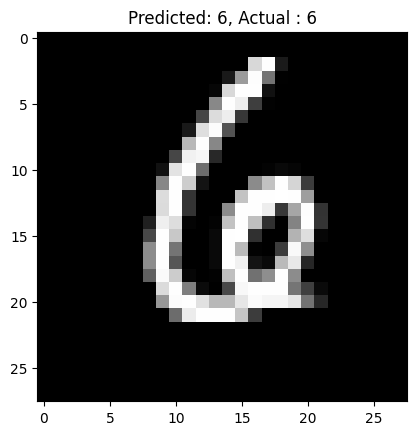

In [13]:
import matplotlib.pyplot as plt

idx = 123
img = X_test[idx].reshape(28, 28)
predicted = model.predict(X_test[idx].reshape(1,784)).argmax()

plt.imshow(img, cmap='gray')
plt.title(f'Predicted: {predicted}, Actual : {y_test[idx]}')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


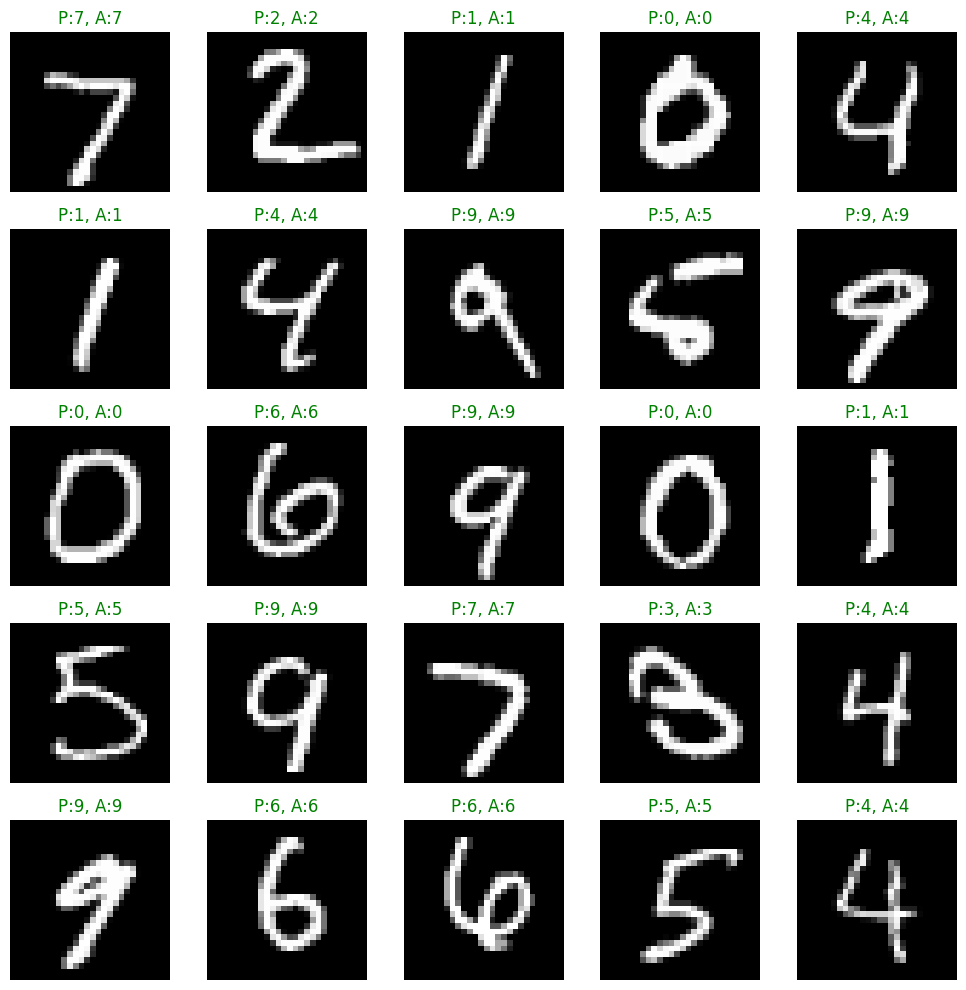

In [14]:

num_images = 25
plt.figure(figsize=(10,10))

for i in range(num_images):
  
    img = X_test[i].reshape(28, 28)
    
    
    prediction = model.predict(X_test[i].reshape(1, 784)).argmax()
    
    
    actual = y_test[i]
    
   
    plt.subplot(5, 5, i+1)
    plt.imshow(img, cmap='gray')
    color = 'green' if prediction == actual else 'red'
    plt.title(f"P:{prediction}, A:{actual}", color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


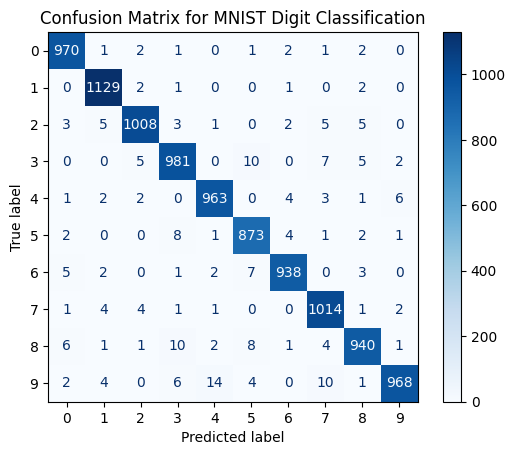

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


cm = confusion_matrix(y_test, y_pred_classes)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix for MNIST Digit Classification")
plt.show()


In [16]:
model.save('mnist_ffnn_model.h5')


In [17]:
from tensorflow.keras.models import load_model

loaded_model = load_model('mnist_ffnn_model.h5')


loaded_model.evaluate(X_test, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9758 - loss: 0.0817


[0.07074567675590515, 0.9783999919891357]